# FINAL YEAR PROJECT

DATA PRE PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
dataset = pd.read_csv('Combined.csv')
dataset

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
22073,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
22074,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [2]:
dataset = dataset.drop(['Unnamed: 0','Sector'], axis='columns')

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:, 0:222])
dataset.iloc[:, 0:222] = imputer.transform(dataset.iloc[:, 0:222])

In [4]:
imputer = SimpleImputer(missing_values=0,strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:, 0:222])
dataset.iloc[:, 0:222] = imputer.transform(dataset.iloc[:, 0:222])

In [5]:
# Generate a new dataset with the same features as df but more rows
num_rows = 100000  # Number of rows in the new dataset
num_columns = dataset.shape[1]  # Number of columns in the new dataset
new_data = np.vstack([dataset] * (num_rows // len(dataset)))

# If necessary, add additional rows to the new dataset to reach the desired number of rows
remaining_rows = num_rows - len(new_data)
if remaining_rows > 0:
    new_data = np.vstack([new_data, dataset[:remaining_rows]])

In [6]:
# Obtain the column names from the original dataframe
column_names = dataset.columns

# Create the new dataframe with the same column names as the original dataframe
dataset = pd.DataFrame(new_data, columns=column_names)

In [7]:
df = dataset.iloc[:, 0:223]  #ALL FEATURES
df2 = dataset.drop('2015 PRICE VAR [%]', axis = 1)
df3 = dataset.iloc[:, 0:223]

In [8]:
X1 = df.iloc[:,:-1]
X2 = df2.iloc[:,:-1]
Y1 = df['Class']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
#SVC WITH ALL FEATURES

xtrain, xtest, ytrain, y_test_SVC1 = train_test_split(X1, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVC1 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVC1, y_pred_SVC1))
SVC1 = metrics.accuracy_score(y_test_SVC1, y_pred_SVC1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVC1, y_pred_SVC1))
print("_______________________________________________________________________")
print(classification_report(y_test_SVC1, y_pred_SVC1))

Accuracy: 0.5775375
_______________________________________________________________________
[[11853 23633]
 [10164 34350]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.54      0.33      0.41     35486
         1.0       0.59      0.77      0.67     44514

    accuracy                           0.58     80000
   macro avg       0.57      0.55      0.54     80000
weighted avg       0.57      0.58      0.56     80000



In [11]:
#SVC WITH ALL FEATURES EXCEPT ONE

xtrain, xtest, ytrain, y_test_SVC2 = train_test_split(X2, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVC2 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVC2, y_pred_SVC2))
SVC2 = metrics.accuracy_score(y_test_SVC2, y_pred_SVC2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVC2, y_pred_SVC2))
print("_______________________________________________________________________")
print(classification_report(y_test_SVC2, y_pred_SVC2))

Accuracy: 0.556875
_______________________________________________________________________
[[    2 35450]
 [    0 44548]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00     35452
         1.0       0.56      1.00      0.72     44548

    accuracy                           0.56     80000
   macro avg       0.78      0.50      0.36     80000
weighted avg       0.75      0.56      0.40     80000



In [12]:
#RF WITH ALL FEATURES

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RF1 = train_test_split(X1, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RF1 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RF1, y_pred_RF1))
RF1 = metrics.accuracy_score(y_test_RF1, y_pred_RF1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RF1, y_pred_RF1))
print("_______________________________________________________________________")
print(classification_report(y_test_RF1, y_pred_RF1))

Accuracy: 0.999825
_______________________________________________________________________
[[35538    14]
 [    0 44448]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35552
         1.0       1.00      1.00      1.00     44448

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [13]:
#RF WITH ALL FEATURES EXCEPT ONE

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RF2 = train_test_split(X2, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RF2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RF2, y_pred_RF2))
RF2 = metrics.accuracy_score(y_test_RF2, y_pred_RF2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RF2, y_pred_RF2))
print("_______________________________________________________________________")
print(classification_report(y_test_RF2, y_pred_RF2))

Accuracy: 0.814525
_______________________________________________________________________
[[27732  7694]
 [ 7144 37430]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79     35426
         1.0       0.83      0.84      0.83     44574

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



In [14]:
#ADA WITH ALL FEATURES

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADA1 = train_test_split(X1, Y1, test_size=0.8) 

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADA1 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADA1, y_pred_ADA1))
ADA1 = metrics.accuracy_score(y_test_ADA1, y_pred_ADA1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADA1, y_pred_ADA1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADA1, y_pred_ADA1))

Accuracy: 0.9999375
_______________________________________________________________________
[[35536     5]
 [    0 44459]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35541
         1.0       1.00      1.00      1.00     44459

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [15]:
#ADA WITH ALL FEATURES EXCEPT ONE

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADA2 = train_test_split(X2, Y1, test_size=0.8) 

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

y_pred_ADA2 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADA2, y_pred_ADA2))
ADA2 = metrics.accuracy_score(y_test_ADA2, y_pred_ADA2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADA2, y_pred_ADA2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADA2, y_pred_ADA2))

Accuracy: 0.6193875
_______________________________________________________________________
[[15372 20157]
 [10292 34179]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50     35529
         1.0       0.63      0.77      0.69     44471

    accuracy                           0.62     80000
   macro avg       0.61      0.60      0.60     80000
weighted avg       0.62      0.62      0.61     80000



RFE

In [16]:
X1 = df3.iloc[:,:-1]
X2 = df2.iloc[:,:-1]
Y = df3['Class']

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into train and test sets
X_train, X_test, y_train, y_test_RFE1 = train_test_split(X1, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)

# Use RFE to perform feature selection
feature_selector = RFE(clf, n_features_to_select=30, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names1 = np.array(X1.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names1)}')

Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
F

In [18]:
# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_RFE1 = clf.predict(X_test_selected)

# Calculate the accuracy
RFE1 = accuracy_score(y_test_RFE1, y_pred_RFE1)
print("Accuracy:",metrics.accuracy_score(y_test_RFE1, y_pred_RFE1))
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFE1, y_pred_RFE1))
print("_______________________________________________________________________")
print(classification_report(y_test_RFE1, y_pred_RFE1))

Accuracy: 1.0
_______________________________________________________________________
[[35619     0]
 [    0 44381]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35619
         1.0       1.00      1.00      1.00     44381

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit, cross_val_score 

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.8, random_state=42)

# Use RFECV to perform feature selection with cross-validation
feature_selector = RFECV(clf, cv=shuffle_split, scoring='accuracy', verbose=2)
feature_selector.fit(X1, Y)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names2 = np.array(X1.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names2)}')

Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
F

Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
F

Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
F

Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
F

Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
F

Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
F

In [20]:
# Use the selected features to train the classifier
X_selected = feature_selector.transform(X1)

# Evaluate the classifier using cross-validation
scores = cross_val_score(clf, X_selected, Y, cv=shuffle_split, scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Mean score: {np.mean(scores):.2f}')
print(f'Standard deviation: {np.std(scores):.2f}')
RFECV1 = scores

Cross-validation scores: [1.        1.        0.9999375 1.        1.       ]
Mean score: 1.00
Standard deviation: 0.00


In [21]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test_RFE2 = train_test_split(X2, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)

# Use RFE to perform feature selection
feature_selector = RFE(clf, n_features_to_select=30, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names3 = np.array(X2.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names3)}')

Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
F

In [22]:
# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_RFE2 = clf.predict(X_test_selected)

# Calculate the accuracy
RFE2 = accuracy_score(y_test_RFE2, y_pred_RFE2)
print("Accuracy:",metrics.accuracy_score(y_test_RFE2, y_pred_RFE2))
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFE2, y_pred_RFE2))
print("_______________________________________________________________________")
print(classification_report(y_test_RFE2, y_pred_RFE2))

Accuracy: 0.8165125
_______________________________________________________________________
[[25692  9927]
 [ 4752 39629]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78     35619
         1.0       0.80      0.89      0.84     44381

    accuracy                           0.82     80000
   macro avg       0.82      0.81      0.81     80000
weighted avg       0.82      0.82      0.81     80000



In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=110)
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.8, random_state=42)

# Use RFECV to perform feature selection with cross-validation
feature_selector = RFECV(clf, cv=shuffle_split, scoring='accuracy', verbose=2)
feature_selector.fit(X2, Y)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names4 = np.array(X2.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names4)}')

Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
F

Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
F

Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
F

Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
F

Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
F

Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
F

In [24]:
# Use the selected features to train the classifier
X_selected = feature_selector.transform(X2)

# Evaluate the classifier using cross-validation
scores = cross_val_score(clf, X_selected, Y, cv=shuffle_split, scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Mean score: {np.mean(scores):.2f}')
print(f'Standard deviation: {np.std(scores):.2f}')
RFECV2 = scores

Cross-validation scores: [0.8194625 0.8147125 0.8185125 0.8170375 0.8162875]
Mean score: 0.82
Standard deviation: 0.00


RFE

*BORUTA*

In [25]:
X = df3.iloc[:,:-1]
Y = df3['Class']
p = X

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test_B1 = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100)

# Use BorutaPy to perform feature selection
feature_selector = BorutaPy(clf, n_estimators='auto', max_iter=1000, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

Iteration: 	1 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	2 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	3 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	4 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	5 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	6 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	7 / 1000
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	8 / 1000
Confirmed: 	83
Tentative: 	70
Rejected: 	69
Iteration: 	9 / 1000
Confirmed: 	83
Tentative: 	70
Rejected: 	69
Iteration: 	10 / 1000
Confirmed: 	83
Tentative: 	70
Rejected: 	69
Iteration: 	11 / 1000
Confirmed: 	83
Tentative: 	70
Rejected: 	69
Iteration: 	12 / 1000
Confirmed: 	88
Tentative: 	65
Rejected: 	69
Iteration: 	13 / 1000
Confirmed: 	88
Tentative: 	56
Rejected: 	78
Iteration: 	14 / 1000
Confirmed: 	88
Tentative: 	56
Rejected: 	78
Iteration: 	15 / 1000
Confirmed: 	88
Tentative: 	56
Rejected: 	78
Iteration: 	16 / 1000
Conf

Iteration: 	124 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	125 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	126 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	127 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	128 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	129 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	130 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	131 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	132 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	133 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	134 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	135 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	136 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	137 / 1000
Confirmed: 	120
Tentative: 	12
Rejected: 	90
Iteration: 	138 / 1000
Confirmed: 	120
Tentative

Iteration: 	245 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	246 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	247 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	248 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	249 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	250 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	251 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	252 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	253 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	254 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	255 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	256 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	257 / 1000
Confirmed: 	123
Tentative: 	9
Rejected: 	90
Iteration: 	258 / 1000
Confirmed: 	124
Tentative: 	8
Rejected: 	90
Iteration: 	259 / 1000
Confirmed: 	124
Tentative: 	8
Rejected:

Iteration: 	368 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	369 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	370 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	371 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	372 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	373 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	374 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	375 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	376 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	377 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	378 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	379 / 1000
Confirmed: 	127
Tentative: 	5
Rejected: 	90
Iteration: 	380 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	381 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	382 / 1000
Confirmed: 	128
Tentative: 	4
Rejected:

Iteration: 	491 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	492 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	493 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	494 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	495 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	496 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	497 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	498 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	499 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	500 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	501 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	502 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	503 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	504 / 1000
Confirmed: 	128
Tentative: 	4
Rejected: 	90
Iteration: 	505 / 1000
Confirmed: 	128
Tentative: 	4
Rejected:

Iteration: 	614 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	615 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	616 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	617 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	618 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	619 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	620 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	621 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	622 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	623 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	624 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	625 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	626 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	627 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	628 / 1000
Confirmed: 	128
Tentative: 	3
Rejected:

Iteration: 	737 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	738 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	739 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	740 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	741 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	742 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	743 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	744 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	745 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	746 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	747 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	748 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	749 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	750 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	751 / 1000
Confirmed: 	128
Tentative: 	3
Rejected:

Iteration: 	860 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	861 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	862 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	863 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	864 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	865 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	866 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	867 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	868 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	869 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	870 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	871 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	872 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	873 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	874 / 1000
Confirmed: 	128
Tentative: 	3
Rejected:

Iteration: 	983 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	984 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	985 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	986 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	987 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	988 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	989 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	990 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	991 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	992 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	993 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	994 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	995 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	996 / 1000
Confirmed: 	128
Tentative: 	3
Rejected: 	91
Iteration: 	997 / 1000
Confirmed: 	128
Tentative: 	3
Rejected:

In [28]:
# Get the feature names
#feature_names5 = feature_selector.transform(np.array(X.columns))

# Print the selected feature names
#print(f'Selected features: {", ".join(feature_names5)}')

# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_B1 = clf.predict(X_test_selected)

# Calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test_B1, y_pred_B1))
B1 = metrics.accuracy_score(y_test_B1, y_pred_B1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_B1, y_pred_B1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_B1, y_pred_B1))

Accuracy: 1.0
_______________________________________________________________________
[[35619     0]
 [    0 44381]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35619
         1.0       1.00      1.00      1.00     44381

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [29]:
feature_names5 = pd.DataFrame({"Column_names" :p.columns, "Feat_imp" : list(feature_selector.support_)})
feature_names5

,Column_names,Feat_imp
0,Revenue,False
1,Revenue Growth,True
2,Cost of Revenue,False
3,Gross Profit,True
4,R&D Expenses,False
...,...,...
217,Book Value per Share Growth,True
218,Debt Growth,False
219,R&D Expense Growth,False
220,SG&A Expenses Growth,True


In [30]:
print(feature_selector.ranking_)

[ 6  1 17  1 43  1  1  1  1  1  1 74 89  1 90  1 22 17  1  1 36  1  1  1
  1  1  1  1  1  1  1  1 80  1  1 52  1  1 31 50 62  8  1  1 33  1 35 20
 91 78 88 34  1 57  1  1 41  5  1  1  1  1  1  1 57 29  1  1  1 71  1  1
  1  1  1 86 75  1  1 46  1  6  1  1  1  1 67  1 48  1  1 94  1  1  1  1
 68  1  1 47  1 14 54  1  1  1  1  1 65  1 92  1 92  1  1 19  1 24  1  1
  1  1 85 63  3 31 17 25  1  1 38 70  1  1  1 81 60 49 59 87  1  2  1  1
  1 39 81 77 14 12  1  1  1  1  1  1 14  1 31  1 64 56  1 83  4 37  1  1
 28 51  1  1  1  1  1  1 61  1  1 43  1  1 66  1 10 53 55 83  1  1  1  1
  1 22  1 21 26  1  1 26  1  1 40  1  2 72 43 43  8  1  1 79 72 75  1  1
  1  1 10 69  1  1]


In [31]:
feature_names5.sort_values(["Feat_imp"] , ascending = False)

,Column_names,Feat_imp
111,daysOfPayablesOutstanding,True
128,capitalExpenditureCoverageRatios,True
113,debtRatio,True
114,debtEquityRatio,True
116,totalDebtToCapitalization,True
...,...,...
47,Total debt,False
48,Deferred revenue,False
131,Revenue per Share,False
130,dividendPayoutRatio,False


In [32]:
feature_names5 = feature_names5[feature_names5["Feat_imp"] == True]
feature_names5

,Column_names,Feat_imp
1,Revenue Growth,True
3,Gross Profit,True
5,SG&A Expense,True
6,Operating Expenses,True
7,Operating Income,True
...,...,...
215,Inventory Growth,True
216,Asset Growth,True
217,Book Value per Share Growth,True
220,SG&A Expenses Growth,True


In [33]:
X = df2.iloc[:,:-1]
Y = df2['Class']
q = X

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test_B2 = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100)

# Use BorutaPy to perform feature selection
feature_selector = BorutaPy(clf, n_estimators='auto', max_iter=200, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_



Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	61
Tentative: 	51
Rejected: 	109
Iteration: 	9 / 200
Confirmed: 	61
Tentative: 	51
Rejected: 	109
Iteration: 	10 / 200
Confirmed: 	61
Tentative: 	51
Rejected: 	109
Iteration: 	11 / 200
Confirmed: 	61
Tentative: 	51
Rejected: 	109
Iteration: 	12 / 200
Confirmed: 	62
Tentative: 	50
Rejected: 	109
Iteration: 	13 / 200
Confirmed: 	62
Tentative: 	43
Rejected: 	116
Iteration: 	14 / 200
Confirmed: 	62
Tentative: 	43
Rejected: 	116
Iteration: 	15 / 200
Confirmed: 	62
Tentative: 	43
Rejected: 	116
Iteration: 	16 / 200
Confirmed: 	

Iteration: 	126 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	127 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	128 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	129 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	130 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	131 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	132 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	133 / 200
Confirmed: 	77
Tentative: 	15
Rejected: 	129
Iteration: 	134 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	135 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	136 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	137 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	138 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	139 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 	129
Iteration: 	140 / 200
Confirmed: 	79
Tentative: 	13
Rejected: 

In [36]:
# Get the feature names
#feature_names = feature_selector.transform(np.array(X.columns))

# Print the selected feature names
#print(f'Selected features: {", ".join(feature_names)}')

# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_B2 = clf.predict(X_test_selected)

# Calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test_B2, y_pred_B2))
B2 = metrics.accuracy_score(y_test_B2, y_pred_B2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_B2, y_pred_B2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_B2, y_pred_B2))

Accuracy: 0.8202875
_______________________________________________________________________
[[26065  9554]
 [ 4823 39558]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78     35619
         1.0       0.81      0.89      0.85     44381

    accuracy                           0.82     80000
   macro avg       0.82      0.81      0.82     80000
weighted avg       0.82      0.82      0.82     80000



In [37]:
feature_names6 = pd.DataFrame({"Column_names" :q.columns, "Feat_imp" : list(feature_selector.support_)})
feature_names6

,Column_names,Feat_imp
0,Revenue,False
1,Revenue Growth,True
2,Cost of Revenue,False
3,Gross Profit,False
4,R&D Expenses,False
...,...,...
216,Asset Growth,True
217,Book Value per Share Growth,True
218,Debt Growth,False
219,R&D Expense Growth,False


In [38]:
print(feature_selector.ranking_)

[ 30   1  68  26 107   1  14   1  28   1   1 117 132   1 134   1  75  70
   1   1  92   1   6   1   1  23   1   1   1   1   1   1 119   3   1  96
  24   2  63  84  83  98   1   8  60   6  68  64 134 127 131  93   1  94
   1   1  79  58  18   1   3   1   1  14  87  70   1  10   1 113   1   1
   1   1   1 121 126   2   1  81   1  47  30  15  27   1 104  20  95   1
  44 137   1   8   1   3 105   1   1  91  21  48  91   2   1   1   1   1
 111  25 135  10 136  40   1  52  38  70  62  42  55   1 128 109  37  73
  55  76   1   1  89 114   1  40  30 129 100  97 102 130  36  52   1   2
   1  82 120 125  65  42   1   1   1   1  33  42  49  33  72   1 103 109
   1 125  35  74  17   1  57  86   1  12   1  66   1  17 100  12   3  89
  23   1 113   1  56  85 107 122   1   1   1   1   1  62   1  53 100   1
   1  59   1   1  78  19  35 110  78  80  50   1   1 123 118 116   1  46
   1   1  46 115   1]


In [39]:
feature_names6.sort_values(["Feat_imp"] , ascending = False)

,Column_names,Feat_imp
220,SG&A Expenses Growth,True
194,Weighted Average Shares Growth,True
68,Issuance (buybacks) of shares,True
66,Investing Cash flow,True
181,Days Payables Outstanding,True
...,...,...
96,returnOnEquity,False
99,eBTperEBIT,False
100,eBITperRevenue,False
101,payablesTurnover,False


In [40]:
feature_names6 = feature_names6[feature_names6["Feat_imp"] == True]
feature_names6

,Column_names,Feat_imp
1,Revenue Growth,True
5,SG&A Expense,True
7,Operating Income,True
9,Earnings before Tax,True
10,Income Tax Expense,True
...,...,...
210,3Y Shareholders Equity Growth (per Share),True
214,Receivables growth,True
216,Asset Growth,True
217,Book Value per Share Growth,True


BORUTA

CFS

In [41]:
# name of the label (can be seen in the dataframe)
label1 = 'Class'

# list with feature names (V1, V2, V3, ...)
features1 = df.columns.tolist()
features1.remove(label1)

In [42]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label1):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label1], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [43]:
#subset = ['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit']
subset = []
for i in features1[0:8]:
  subset.append(i)
print(subset)
print(subset[0:2])
corr = df[subset].corr()
corr

['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income']
['Revenue', 'Revenue Growth']


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,1.000000,-0.001748,0.976706,0.803397,0.342568,0.581485,0.505619,0.416293
Revenue Growth,-0.001748,1.000000,-0.001296,-0.002541,-0.001296,-0.001030,-0.002754,-0.002431
Cost of Revenue,0.976706,-0.001296,1.000000,0.666432,0.281878,0.439615,0.340558,0.259878
Gross Profit,0.803397,-0.002541,0.666432,1.000000,0.425654,0.849272,0.859256,0.759030
R&D Expenses,0.342568,-0.001296,0.281878,0.425654,1.000000,0.273579,0.348657,0.355966
SG&A Expense,0.581485,-0.001030,0.439615,0.849272,0.273579,1.000000,0.872368,0.644330
Operating Expenses,0.505619,-0.002754,0.340558,0.859256,0.348657,0.872368,1.000000,0.659444
Operating Income,0.416293,-0.002431,0.259878,0.759030,0.355966,0.644330,0.659444,1.000000


In [44]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,NaN,-0.001748,0.976706,0.803397,0.342568,0.581485,0.505619,0.416293
Revenue Growth,NaN,NaN,-0.001296,-0.002541,-0.001296,-0.001030,-0.002754,-0.002431
Cost of Revenue,NaN,NaN,NaN,0.666432,0.281878,0.439615,0.340558,0.259878
Gross Profit,NaN,NaN,NaN,NaN,0.425654,0.849272,0.859256,0.759030
R&D Expenses,NaN,NaN,NaN,NaN,NaN,0.273579,0.348657,0.355966
SG&A Expense,NaN,NaN,NaN,NaN,NaN,NaN,0.872368,0.644330
Operating Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659444
Operating Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
best_value = -1
best_feature = ''
for feature in features1:
    coeff = pointbiserialr( df[label1], df[feature] )
    abs_coeff = abs( coeff.correlation)
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature 10Y Shareholders Equity Growth (per Share) with merit 0.0560


C:\Users\Shree\.conda\envs\Shree\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [46]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)





# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 10




# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset1 = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features1:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label1)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [47]:
best_subset1    #Best Features

['10Y Shareholders Equity Growth (per Share)',
 'Enterprise Value',
 '5Y Revenue Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 'Gross Margin',
 'Cash and short-term investments',
 '10Y Revenue Growth (per Share)',
 'Price to Sales Ratio',
 '3Y Dividend per Share Growth (per Share)',
 'R&D Expenses',
 'returnOnAssets',
 'Book Value per Share Growth',
 '5Y Operating CF Growth (per Share)',
 '2015 PRICE VAR [%]',
 'PFCF ratio',
 'Tangible Book Value per Share',
 'Enterprise Value over EBITDA',
 'SG&A Expenses Growth',
 'Dividend Yield',
 'Net Current Asset Value',
 '10Y Dividend per Share Growth (per Share)',
 'Stock-based compensation to Revenue',
 'Average Inventory',
 '10Y Net Income Growth (per Share)',
 'EPS',
 'inventoryTurnover',
 'grossProfitMargin',
 'shortTermCoverageRatios',
 'PE ratio',
 'EPS Growth',
 'Dividend per Share',
 'debtEquityRatio',
 'Free Cash Flow',
 'Capex per Share',
 'priceEarningsToGrowthRatio',
 'Graham Number',
 'Inventory Growth',
 'Gro

In [48]:
# name of the label (can be seen in the dataframe)
#label1 = 'Class'

# list with feature names (V1, V2, V3, ...)
features2 = df2.columns.tolist()
features2.remove(label1)

In [49]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label1):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df2[label1], df2[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [50]:
#subset = ['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit']
subset = []
for i in features2[0:8]:
  subset.append(i)
print(subset)
print(subset[0:2])
corr = df2[subset].corr()
corr

['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income']
['Revenue', 'Revenue Growth']


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,1.000000,-0.001748,0.976706,0.803397,0.342568,0.581485,0.505619,0.416293
Revenue Growth,-0.001748,1.000000,-0.001296,-0.002541,-0.001296,-0.001030,-0.002754,-0.002431
Cost of Revenue,0.976706,-0.001296,1.000000,0.666432,0.281878,0.439615,0.340558,0.259878
Gross Profit,0.803397,-0.002541,0.666432,1.000000,0.425654,0.849272,0.859256,0.759030
R&D Expenses,0.342568,-0.001296,0.281878,0.425654,1.000000,0.273579,0.348657,0.355966
SG&A Expense,0.581485,-0.001030,0.439615,0.849272,0.273579,1.000000,0.872368,0.644330
Operating Expenses,0.505619,-0.002754,0.340558,0.859256,0.348657,0.872368,1.000000,0.659444
Operating Income,0.416293,-0.002431,0.259878,0.759030,0.355966,0.644330,0.659444,1.000000


In [51]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,NaN,-0.001748,0.976706,0.803397,0.342568,0.581485,0.505619,0.416293
Revenue Growth,NaN,NaN,-0.001296,-0.002541,-0.001296,-0.001030,-0.002754,-0.002431
Cost of Revenue,NaN,NaN,NaN,0.666432,0.281878,0.439615,0.340558,0.259878
Gross Profit,NaN,NaN,NaN,NaN,0.425654,0.849272,0.859256,0.759030
R&D Expenses,NaN,NaN,NaN,NaN,NaN,0.273579,0.348657,0.355966
SG&A Expense,NaN,NaN,NaN,NaN,NaN,NaN,0.872368,0.644330
Operating Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659444
Operating Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
best_value = -1
best_feature = ''
for feature in features2:
    coeff = pointbiserialr( df2[label1], df2[feature] )
    abs_coeff = abs( coeff.correlation)
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature 10Y Shareholders Equity Growth (per Share) with merit 0.0560


C:\Users\Shree\.conda\envs\Shree\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [53]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)





# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 10




# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset2 = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features2:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label1)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [54]:
best_subset2

['10Y Shareholders Equity Growth (per Share)',
 'Enterprise Value',
 '5Y Revenue Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 'Gross Margin',
 'Cash and short-term investments',
 '10Y Revenue Growth (per Share)',
 'Price to Sales Ratio',
 '3Y Dividend per Share Growth (per Share)',
 'R&D Expenses',
 'returnOnAssets',
 'Book Value per Share Growth',
 '5Y Operating CF Growth (per Share)',
 'PFCF ratio',
 'Tangible Book Value per Share',
 'Enterprise Value over EBITDA',
 'SG&A Expenses Growth',
 'Dividend Yield',
 'Net Current Asset Value',
 '10Y Dividend per Share Growth (per Share)',
 'Stock-based compensation to Revenue',
 'Average Inventory',
 '10Y Net Income Growth (per Share)',
 'EPS',
 'inventoryTurnover',
 'grossProfitMargin',
 'shortTermCoverageRatios',
 'EPS Growth',
 'PE ratio',
 'Dividend per Share',
 'debtEquityRatio',
 'Free Cash Flow',
 'Capex per Share',
 'priceEarningsToGrowthRatio',
 'Graham Number',
 'Inventory Growth',
 'Gross Profit Growth',
 'op

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[best_subset1])
X = scaler.transform(df[best_subset1])

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[best_subset2])
X = scaler.transform(df[best_subset2])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# predictors
X1 = df[best_subset1].to_numpy()
# target
Y1 = df[label1].to_numpy()
# predictors
X2 = df[best_subset2].to_numpy()

In [58]:
xtrain, xtest, ytrain, y_test_SVCCFS1 = train_test_split(X1, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVCCFS1 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVCCFS1, y_pred_SVCCFS1))
SVC_CFS1 = metrics.accuracy_score(y_test_SVCCFS1, y_pred_SVCCFS1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVCCFS1, y_pred_SVCCFS1))
print("_______________________________________________________________________")
print(classification_report(y_test_SVCCFS1, y_pred_SVCCFS1))

Accuracy: 0.5562125
_______________________________________________________________________
[[   56 35495]
 [    8 44441]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.88      0.00      0.00     35551
         1.0       0.56      1.00      0.71     44449

    accuracy                           0.56     80000
   macro avg       0.72      0.50      0.36     80000
weighted avg       0.70      0.56      0.40     80000



In [59]:
xtrain, xtest, ytrain, y_test_SVCCFS2 = train_test_split(X2, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVCCFS2 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVCCFS2, y_pred_SVCCFS2))
SVC_CFS2 = metrics.accuracy_score(y_test_SVCCFS2, y_pred_SVCCFS2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVCCFS2, y_pred_SVCCFS2))
print("_______________________________________________________________________")
print(classification_report(y_test_SVCCFS2, y_pred_SVCCFS2))

Accuracy: 0.5572625
_______________________________________________________________________
[[  119 35330]
 [   89 44462]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.57      0.00      0.01     35449
         1.0       0.56      1.00      0.72     44551

    accuracy                           0.56     80000
   macro avg       0.56      0.50      0.36     80000
weighted avg       0.56      0.56      0.40     80000



In [60]:
#RF WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RFCFS1 = train_test_split(X1, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RFCFS1 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RFCFS1, y_pred_RFCFS1))
RF_CFS1 = metrics.accuracy_score(y_test_RFCFS1, y_pred_RFCFS1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFCFS1, y_pred_RFCFS1))
print("_______________________________________________________________________")
print(classification_report(y_test_RFCFS1, y_pred_RFCFS1))

Accuracy: 0.99995
_______________________________________________________________________
[[35357     0]
 [    4 44639]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35357
         1.0       1.00      1.00      1.00     44643

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [61]:
#RF WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RFCFS2 = train_test_split(X2, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RFCFS2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RFCFS2, y_pred_RFCFS2))
RF_CFS2 = metrics.accuracy_score(y_test_RFCFS2, y_pred_RFCFS2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFCFS2, y_pred_RFCFS2))
print("_______________________________________________________________________")
print(classification_report(y_test_RFCFS2, y_pred_RFCFS2))

Accuracy: 0.8116375
_______________________________________________________________________
[[25951  9640]
 [ 5429 38980]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.83      0.73      0.77     35591
         1.0       0.80      0.88      0.84     44409

    accuracy                           0.81     80000
   macro avg       0.81      0.80      0.81     80000
weighted avg       0.81      0.81      0.81     80000



In [62]:
#ADA WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADACFS1 = train_test_split(X1, Y1, test_size=0.8) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_model, X_train, y_train, cv=5)
# Print the mean and standard deviation of the scores
print("Mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADACFS1 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADACFS1, y_pred_ADACFS1))
ADA_CFS1 = metrics.accuracy_score(y_test_ADACFS1, y_pred_ADACFS1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADACFS1, y_pred_ADACFS1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADACFS1, y_pred_ADACFS1))

Mean score: 1.00 (+/- 0.00)
Accuracy: 1.0
_______________________________________________________________________
[[35608     0]
 [    0 44392]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35608
         1.0       1.00      1.00      1.00     44392

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [63]:
#ADA WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADACFS2 = train_test_split(X2, Y1, test_size=0.8) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_model, X_train, y_train, cv=5)
# Print the mean and standard deviation of the scores
print("Mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADACFS2 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADACFS2, y_pred_ADACFS2))
ADA_CFS2 = metrics.accuracy_score(y_test_ADACFS2, y_pred_ADACFS2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADACFS2, y_pred_ADACFS2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADACFS2, y_pred_ADACFS2))

Mean score: 0.61 (+/- 0.01)
Accuracy: 0.61295
_______________________________________________________________________
[[14558 21003]
 [ 9961 34478]]
_______________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.59      0.41      0.48     35561
         1.0       0.62      0.78      0.69     44439

    accuracy                           0.61     80000
   macro avg       0.61      0.59      0.59     80000
weighted avg       0.61      0.61      0.60     80000



CFS

DATA VISUALIZATION

In [64]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='brown', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


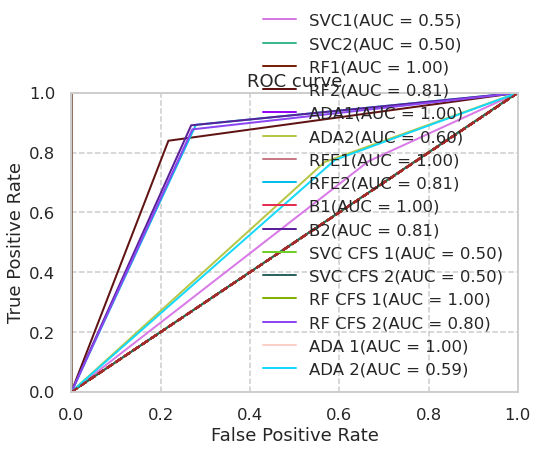

<Figure size 720000x720000 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt
plotAUC(y_test_SVC1, y_pred_SVC1, 'SVC1')
plotAUC(y_test_SVC2, y_pred_SVC2, 'SVC2')
plotAUC(y_test_RF1, y_pred_RF1, 'RF1')
plotAUC(y_test_RF2, y_pred_RF2, 'RF2')
plotAUC(y_test_ADA1, y_pred_ADA1, 'ADA1')
plotAUC(y_test_ADA2, y_pred_ADA2, 'ADA2')
plotAUC(y_test_RFE1, y_pred_RFE1, 'RFE1')
plotAUC(y_test_RFE2, y_pred_RFE2, 'RFE2')
plotAUC(y_test_B1, y_pred_B1, 'B1')
plotAUC(y_test_B2, y_pred_B2, 'B2')
plotAUC(y_test_SVCCFS1, y_pred_SVCCFS1, 'SVC CFS 1')
plotAUC(y_test_SVCCFS2, y_pred_SVCCFS2, 'SVC CFS 2')
plotAUC(y_test_RFCFS1, y_pred_RFCFS1, 'RF CFS 1')
plotAUC(y_test_RFCFS2, y_pred_RFCFS2, 'RF CFS 2')
plotAUC(y_test_ADACFS1, y_pred_ADACFS1, 'ADA 1')
plotAUC(y_test_ADACFS2, y_pred_ADACFS2, 'ADA 2')


plt.show()
plt.figure(figsize=(10000,10000))
plt.show()

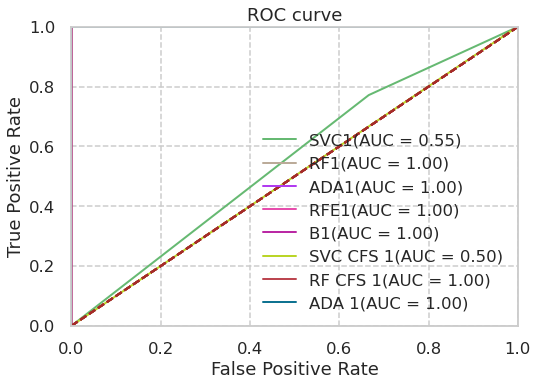

<Figure size 360000x360000 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
plotAUC(y_test_SVC1, y_pred_SVC1, 'SVC1')
plotAUC(y_test_RF1, y_pred_RF1, 'RF1')
plotAUC(y_test_ADA1, y_pred_ADA1, 'ADA1')
plotAUC(y_test_RFE1, y_pred_RFE1, 'RFE1')
plotAUC(y_test_B1, y_pred_B1, 'B1')
plotAUC(y_test_SVCCFS1, y_pred_SVCCFS1, 'SVC CFS 1')
plotAUC(y_test_RFCFS1, y_pred_RFCFS1, 'RF CFS 1')
plotAUC(y_test_ADACFS1, y_pred_ADACFS1, 'ADA 1')


plt.show()
plt.figure(figsize=(5000,5000))
plt.show()

In [67]:
list1 = [SVC1,SVC2,RF1,RF2,ADA1,ADA2]
list2 = [RFE1,RFE2,B1,B2]
list3 = [RFECV1,RFECV2]
list4 = [SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]
label = ['SVC1','SVC2','RF1','RF2','ADA1','ADA2','RFE1','RFE2','B1','B2','SVCCFS1','SVCCFS2','RFCFS1','RFCFS2','ADACFS1','ADACFS2']
accuracies = [SVC1,SVC2,RF1,RF2,ADA1,ADA2,RFE1,RFE2,B1,B2,SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]

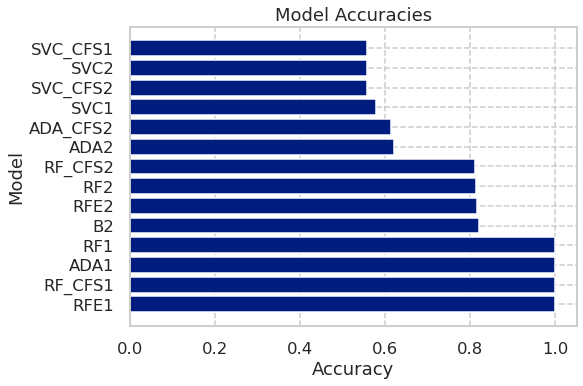

In [68]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2,
             'RFE1': RFE1, 'RFE2': RFE2, 'B1': B1, 'B2': B2, 'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

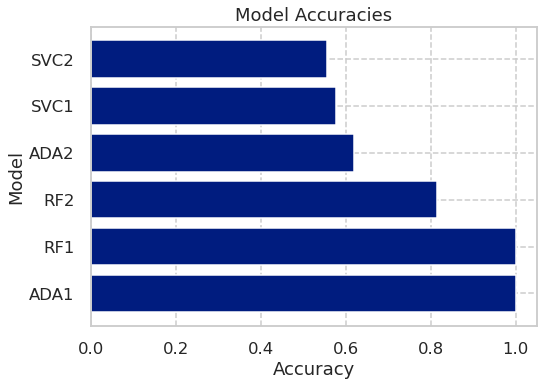

In [69]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

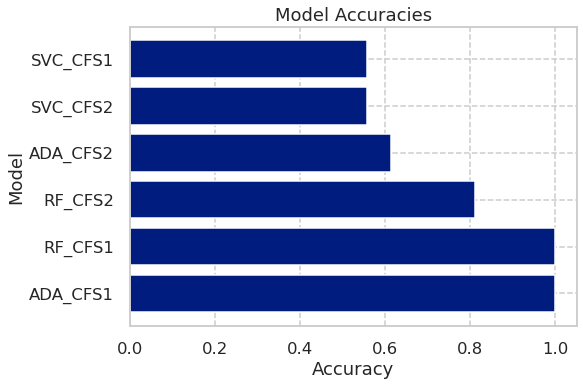

In [70]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

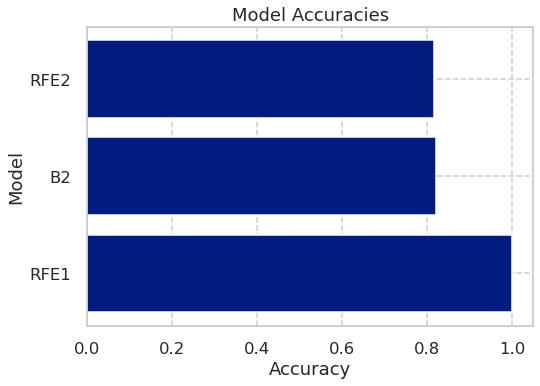

In [71]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'RFE1': RFE1, 'RFE2': RFE2, 'B1': B1, 'B2': B2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

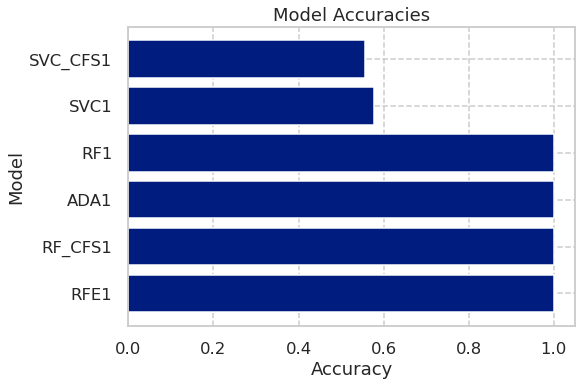

In [72]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'RF1': RF1, 'ADA1': ADA1,
             'RFE1': RFE1, 'B1': B1, 'SVC_CFS1': SVC_CFS1,
             'RF_CFS1': RF_CFS1, 'ADA_CFS1': ADA_CFS1}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

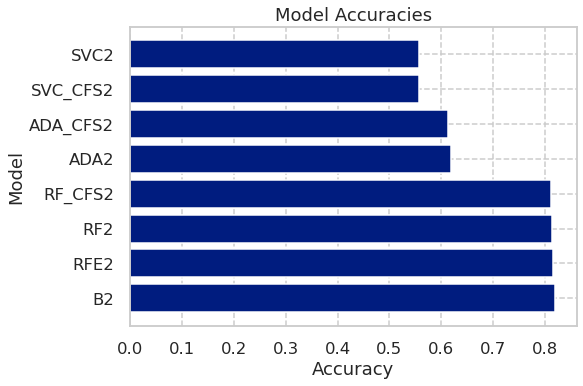

In [73]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC2': SVC2, 'RF2': RF2, 'ADA2': ADA2,
             'RFE2': RFE2, 'B2': B2, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS2': RF_CFS2, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

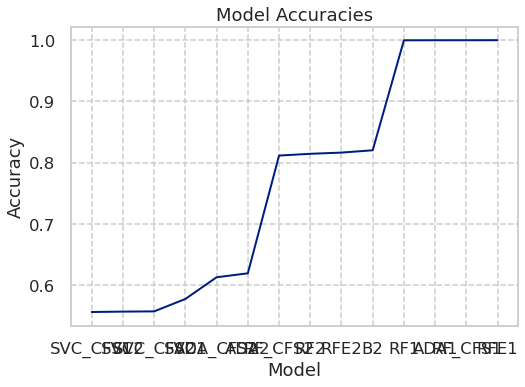

In [74]:
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2,
             'RFE1': RFE1, 'RFE2': RFE2, 'B1': B1, 'B2': B2, 'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}
sorted_accuracies = sorted(accuracies.values())

labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Extract the keys and values from the dictionary
#x = list(accuracies.keys())
#y = list(accuracies.values())

# Create a line plot
plt.plot(labels, heights)

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

In [75]:
# Import the required libraries
import pandas as pd
from IPython.display import display, HTML

# Define the dictionary
label = ['SVC1','SVC2','RF1','RF2','ADA1','ADA2','RFE1','RFE2','B1','B2','SVCCFS1','SVCCFS2','RFCFS1','RFCFS2','ADACFS1','ADACFS2']
accuracies = [SVC1,SVC2,RF1,RF2,ADA1,ADA2,RFE1,RFE2,B1,B2,SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]

data = ({"Accuracy":accuracies,
         "Model":label})
#print(acc_list)

# Convert the dictionary to a dataframe
df = pd.DataFrame(data)

# Convert the dataframe to an HTML table
table = df.to_html()

# Display the table
display(HTML(table))

,Accuracy,Model
0,0.577538,SVC1
1,0.556875,SVC2
2,0.999825,RF1
3,0.814525,RF2
4,0.999938,ADA1
5,0.619387,ADA2
6,1.000000,RFE1
7,0.816512,RFE2
8,1.000000,B1
9,0.820287,B2


In [76]:
list1 = [feature_names1]
list2 = [feature_names2]
list3 = [feature_names3]
list4 = [feature_names4]
list5 = [feature_names5]
list6 = [feature_names6]
list7 = [best_subset1]
list8 = [best_subset2]

# Iterate over the elements of list1
for element in list1:
  # Check if the element is present in all four lists
  if element in list2 and element in list3 and element in list4 and element in list5 and element in list6 and element in list7 and element in list8:
    # Print the element if it is present in all four lists
    print(element)
    
element

C:\Users\Shree\AppData\Local\Temp/ipykernel_19544/303764436.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if element in list2 and element in list3 and element in list4 and element in list5 and element in list6 and element in list7 and element in list8:


array(['Revenue Growth', 'SG&A Expense', 'Net Income', 'Net Income Com',
       'EPS', 'Weighted Average Shs Out',
       'Weighted Average Shs Out (Dil)', 'Profit Margin', 'EBIT',
       'Earnings Before Tax Margin', 'Total non-current assets',
       'Total assets', 'Other Liabilities', 'Financing Cash Flow',
       'Effect of forex changes on cash',
       'Net cash flow / Change in cash', 'Net Cash/Marketcap',
       'priceToOperatingCashFlowsRatio', 'niperEBT', 'quickRatio',
       'operatingCashFlowPerShare', 'Net Income per Share',
       'Operating Cash Flow per Share', 'Earnings Yield',
       'Tangible Asset Value', 'Gross Profit Growth',
       'Operating Income Growth', 'Operating Cash Flow growth',
       'SG&A Expenses Growth', '2015 PRICE VAR [%]'], dtype=object)

In [77]:
data = (element)
#print(acc_list)

# Convert the dictionary to a dataframe
df = pd.DataFrame(data)

# Convert the dataframe to an HTML table
table = df.to_html()

# Display the table
display(HTML(table))

,0
0,Revenue Growth
1,SG&A Expense
2,Net Income
3,Net Income Com
4,EPS
5,Weighted Average Shs Out
6,Weighted Average Shs Out (Dil)
7,Profit Margin
8,EBIT
9,Earnings Before Tax Margin


In [78]:
SVC1
y_test_SVC1, y_pred_SVC1

SVC2
y_test_SVC2, y_pred_SVC2

RF1
y_test_RF1, y_pred_RF1

RF2
y_test_RF2, y_pred_RF2

ADA1
y_test_ADA1, y_pred_ADA1

ADA2
y_test_ADA2, y_pred_ADA2

(68766    1.0
 94261    1.0
 41467    1.0
 13168    0.0
 90007    0.0
         ... 
 12061    1.0
 16712    0.0
 56857    1.0
 82492    0.0
 37736    0.0
 Name: Class, Length: 80000, dtype: float64,
 array([1., 1., 1., ..., 0., 1., 0.]))

In [79]:
feature_names1
RFE1
y_test_RFE1, y_pred_RFE1

feature_names2
RFECV1

feature_names3
RFE2
y_test_RFE2, y_pred_RFE2

feature_names4
RFECV2

B1
y_test_B1, y_pred_B1

B2
y_test_B2, y_pred_B2

(75721    1.0
 80184    0.0
 19864    1.0
 76699    0.0
 92991    1.0
         ... 
 6306     1.0
 51901    0.0
 6028     1.0
 58507    0.0
 2458     0.0
 Name: Class, Length: 80000, dtype: float64,
 array([1., 1., 1., ..., 1., 1., 0.]))

In [80]:
best_subset1
SVC_CFS1
y_test_SVCCFS1, y_pred_SVCCFS1
RF_CFS1
y_test_RFCFS1, y_pred_RFCFS1
ADA_CFS1
y_test_ADACFS1, y_pred_ADACFS1

best_subset2
SVC_CFS2
y_test_SVCCFS2, y_pred_SVCCFS2
RF_CFS2
y_test_RFCFS2, y_pred_RFCFS2
ADA_CFS2
y_test_ADACFS2, y_pred_ADACFS2

(array([0., 1., 1., ..., 1., 1., 0.]), array([0., 1., 0., ..., 1., 1., 1.]))

In [81]:
# Use the columns attribute to create a list of feature names
all_features = df.columns.tolist()

# Print the list of feature names
print(all_features)

# Use the support_ attribute to create lists of selected features
#rfe_features = [feature for feature, selected in zip(all_features, rfe.support_) if selected]
boruta_features = [feature for feature, selected in zip(all_features, boruta.support_) if selected]

# Print the lists of selected features
print(f'RFE features: {rfe_features}')
print(f'Boruta features: {boruta_features}')

[0]


NameError: name 'boruta' is not defined

In [ ]:
#from sets import Set

# Define the lists of features
features_1 = [best_subset1]
features_2 = [best_subset2]
features_3 = [boruta_features]

# Find the common features using the intersection function
common_features = Set(features_1).intersection(Set(features_2)).intersection(Set(features_3))

# Convert the set to a list and print the list of common features
common_features = list(common_features)
print(f'Common features: {common_features}')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the lists of features
features_1 = ['feature_1', 'feature_2', 'feature_3']
features_2 = ['feature_2', 'feature_3', 'feature_4']
features_3 = ['feature_3', 'feature_4', 'feature_5']

# Create the Venn diagram
venn3([set(features_1), set(features_2), set(features_3)], set_labels=('Features 1', 'Features 2', 'Features 3'))

# Show the plot
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Define the accuracy scores for each model
model_1_scores = [0.85, 0.86, 0.87, 0.88, 0.89]  #df1
model_2_scores = [0.80, 0.81, 0.82, 0.83, 0.84]  #df2

# Perform the t-test
t_stat, p_value = ttest_ind(model_1_scores, model_2_scores)

# Print the results
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference between the means of the two models')
else:
    print('There is not a significant difference between the means of the two models')